In [10]:
# custom HTML style: upcoming---
#HTML(readstring(open("styles/custom1.css")))

In [1]:
using Primes
using PyPlot
using BenchmarkTools
BenchmarkTools.DEFAULT_PARAMETERS.samples = 200 

INFO: Precompiling module JLD.


# Problem 7

Let $A$ be the $20\ 000 \times 20\ 000$ matrix whose entries are zero everywhere except for the primes $2, 3, 5, 7, ..., 224737$ along the main diagonal and the number $1$ in all positions $a_{ij} = 1$ with $ |i-j| = 1, 2, 4, ..., 16384$. What is the $(1, 1)$ of entry $A^{-1}$

Es sei $ A $ die $ 20 \ 000 \times 20 \ 000 $ Matrix, deren Elemente sämtlich $Null$ sind bis auf die Primzahlen $ 2, 3, 5,7 ... ,224737$ in der Hauptdiagonalen und die Elemente $a_{ij} = 1$ für $ |i-j| = 1, 2, 4, ..., 16384$. Welchen Wert hat das Element $(1,1)$-Element von $A^{-1}$? 

### Initialisieren der Matrix $A_n$ 

In [2]:
function initialize(n, pₙ)
    d = primes(pₙ)
    Aₙ = spdiagm(d, 0)
    e = ones(n, 1)

    for k in 2.^( 0:floor(Int,log2(n)))
        eₖ = e[1:(n-k)]
        Aₙ = Aₙ + spdiagm( [eₖ,eₖ], [-k k])       
    end
    
    Aₙ
end

initialize (generic function with 1 method)

In [3]:
n = 2000 #20000      
pₙ = 17389 #224737  
Aₙ = initialize(n, pₙ)

  1.287284 seconds (1.03 M allocations: 51.938 MB, 1.26% gc time)


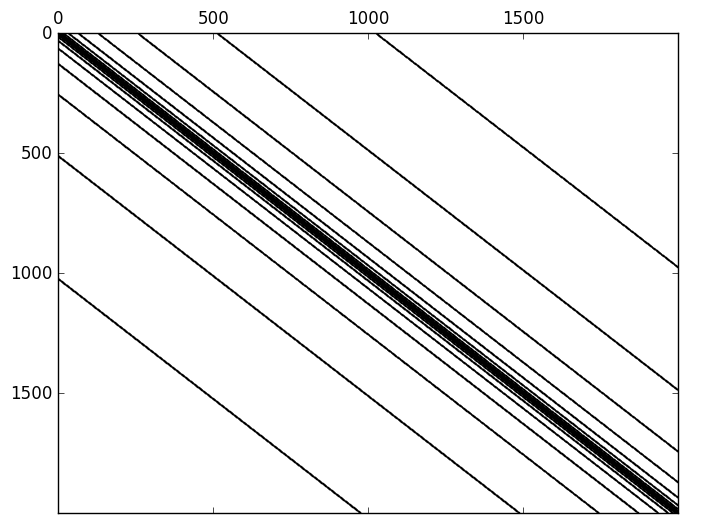

In [4]:
spy(Aₙ, aspect = "auto", markersize = 0.5);

### Direktes Lösen

In [5]:
function solve_direct(Aₙ, b)
    return (Aₙ\b)[1] 
end

solve_direct (generic function with 1 method)

In [11]:
b = zeros(n)
b[1] = 1

@time l₁ = solve_direct(Aₙ,b)
print("l₁ = ", l₁)

  0.797329 seconds (568.38 k allocations: 48.391 MB, 2.91% gc time)
l₁ = 0.7250188326252589

### Cholesky Factorisation with Minimal Degree Algorithm

### Cholesky Factorisation with Reversed Cuthill McKee Algorithmus